Saving train.csv to train.csv
Shape: (891, 12)


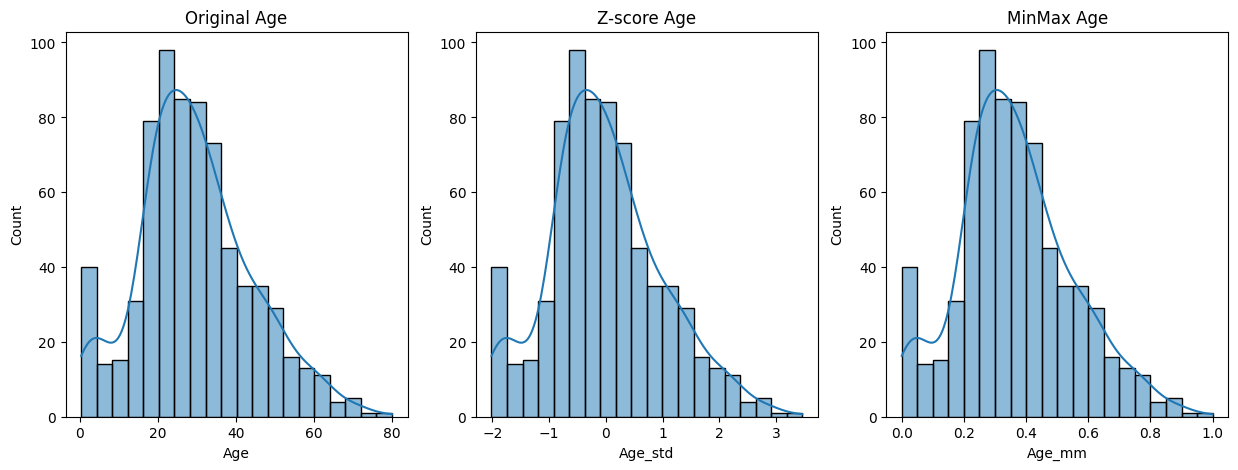

In [2]:
# Exercise 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Upload Titanic dataset (for Google Colab users)
from google.colab import files
uploaded = files.upload()

# Replace the filename if different
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Shape:", df.shape)
df.head()

# Identify numerical columns
num_cols = ["Age", "Fare"]

# Standardization (Z-score)
scaler_std = StandardScaler()
df[["Age_std", "Fare_std"]] = scaler_std.fit_transform(df[num_cols])

# Min-Max Normalization
scaler_mm = MinMaxScaler()
df[["Age_mm", "Fare_mm"]] = scaler_mm.fit_transform(df[num_cols])

# Compare distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df["Age"], kde=True, ax=axes[0]); axes[0].set_title("Original Age")
sns.histplot(df["Age_std"], kde=True, ax=axes[1]); axes[1].set_title("Z-score Age")
sns.histplot(df["Age_mm"], kde=True, ax=axes[2]); axes[2].set_title("MinMax Age")
plt.show()

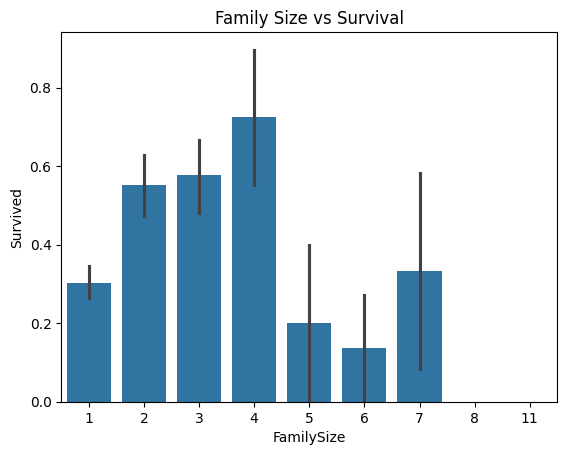

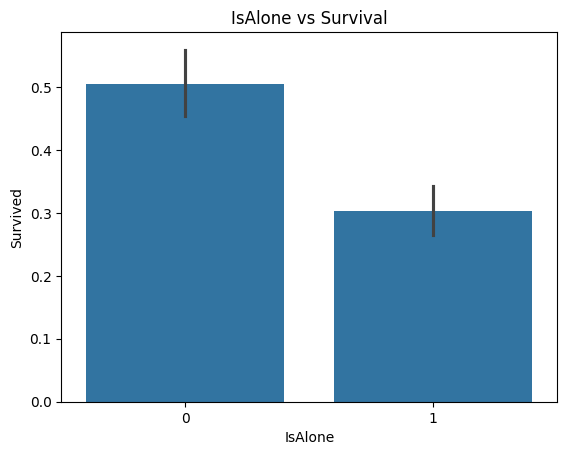

In [3]:
# Exercise 2

# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# IsAlone
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

# Relationship with survival
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Family Size vs Survival")
plt.show()

sns.barplot(x="IsAlone", y="Survived", data=df)
plt.title("IsAlone vs Survival")
plt.show()


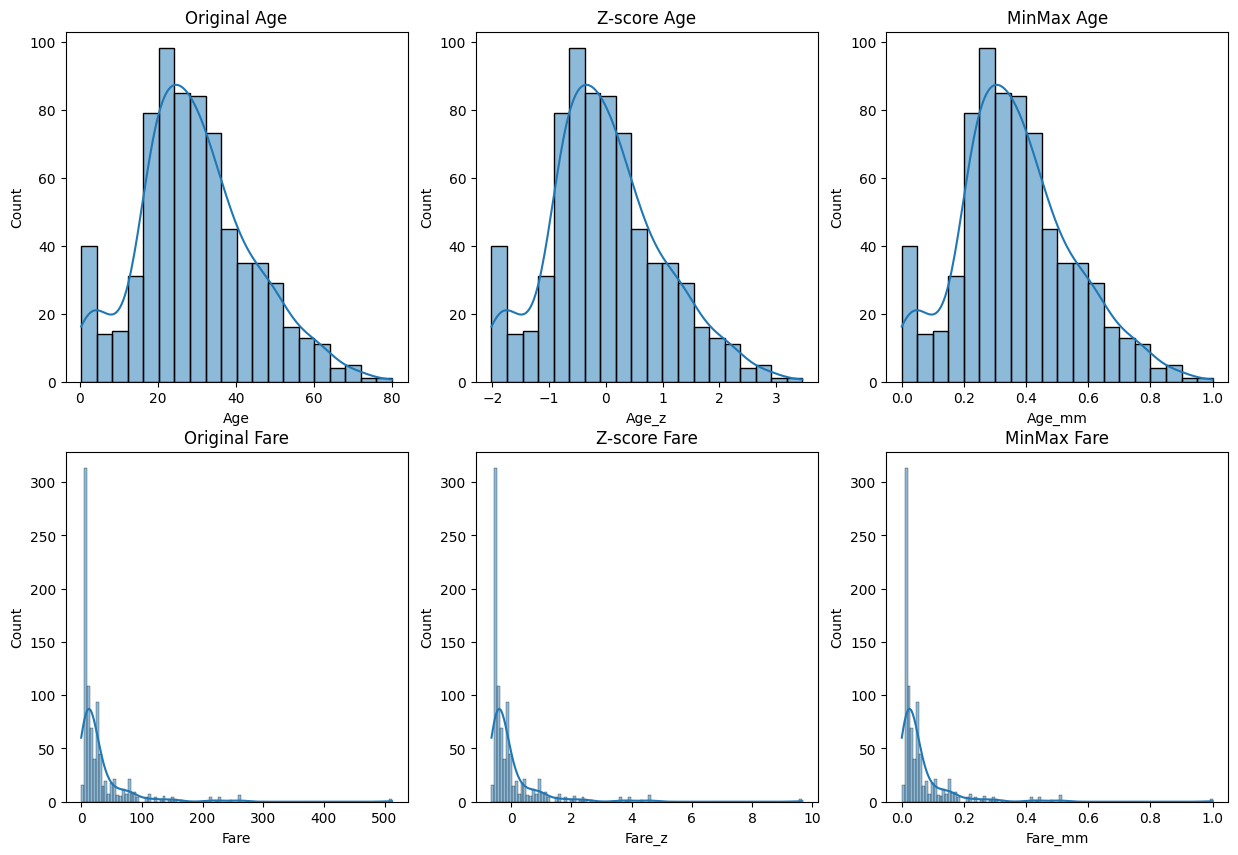

In [4]:
# Exercise 3

# Min-Max & Z-score on Age and Fare
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

df["Age_z"] = scaler_std.fit_transform(df[["Age"]])
df["Fare_z"] = scaler_std.fit_transform(df[["Fare"]])

df["Age_mm"] = scaler_mm.fit_transform(df[["Age"]])
df["Fare_mm"] = scaler_mm.fit_transform(df[["Fare"]])

# Plot histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df["Age"], kde=True, ax=axes[0,0]); axes[0,0].set_title("Original Age")
sns.histplot(df["Age_z"], kde=True, ax=axes[0,1]); axes[0,1].set_title("Z-score Age")
sns.histplot(df["Age_mm"], kde=True, ax=axes[0,2]); axes[0,2].set_title("MinMax Age")

sns.histplot(df["Fare"], kde=True, ax=axes[1,0]); axes[1,0].set_title("Original Fare")
sns.histplot(df["Fare_z"], kde=True, ax=axes[1,1]); axes[1,1].set_title("Z-score Fare")
sns.histplot(df["Fare_mm"], kde=True, ax=axes[1,2]); axes[1,2].set_title("MinMax Fare")
plt.show()


/tmp/ipython-input-1995252690.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["PC1"], df_pca["PC2"] = pc[:,0], pc[:,1]
/tmp/ipython-input-1995252690.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["PC1"], df_pca["PC2"] = pc[:,0], pc[:,1]


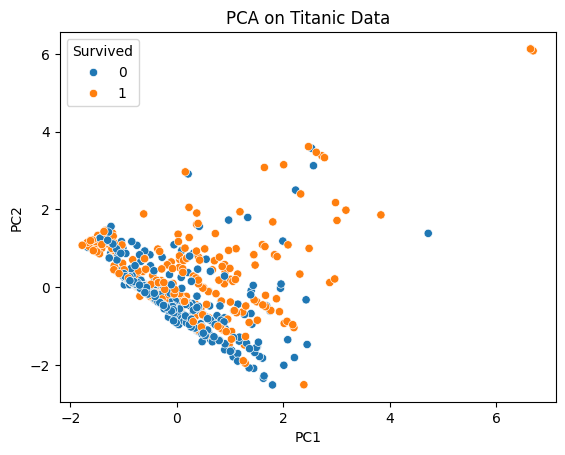

                Age       Fare
Embarked                      
C         30.814769  59.954144
Q         28.089286  13.276030
S         29.445397  27.079812


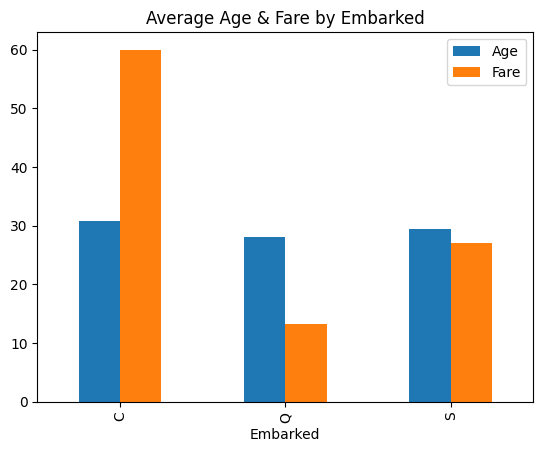

In [5]:
# Exercise 4

# PCA on Age & Fare
features = ["Age", "Fare"]
df_pca = df.dropna(subset=features)
X = df_pca[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

df_pca["PC1"], df_pca["PC2"] = pc[:,0], pc[:,1]

sns.scatterplot(x="PC1", y="PC2", hue="Survived", data=df_pca)
plt.title("PCA on Titanic Data")
plt.show()

# Aggregation: mean Age & Fare per Embarked
agg = df.groupby("Embarked")[["Age", "Fare"]].mean()
print(agg)

agg.plot(kind="bar")
plt.title("Average Age & Fare by Embarked")
plt.show()


In [8]:
# Exercise 5

from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Upload Superstore dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Try with different encodings to handle UnicodeDecodeError
try:
    superstore = pd.read_csv(filename, encoding="utf-8")
except UnicodeDecodeError:
    try:
        superstore = pd.read_csv(filename, encoding="latin1")
    except:
        superstore = pd.read_csv(filename, encoding="ISO-8859-1")

scaler = MinMaxScaler()
superstore["Sales_normalized"] = scaler.fit_transform(superstore[["Sales"]])
superstore["Profit_normalized"] = scaler.fit_transform(superstore[["Profit"]])

print(superstore[["Sales", "Sales_normalized", "Profit", "Profit_normalized"]].head())


Saving superstore_dataset2011-2015.csv to superstore_dataset2011-2015 (1).csv
     Sales  Sales_normalized   Profit  Profit_normalized
0  408.300          0.018016  106.140           0.447076
1  120.366          0.005297   36.036           0.442402
2   66.120          0.002901   29.640           0.441976
3   44.865          0.001962  -26.055           0.438263
4  113.670          0.005002   37.770           0.442518


In [ ]:
# Exercise 6

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload Air Quality dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Try reading with encoding handling
try:
    air = pd.read_csv(filename, encoding="utf-8")
except UnicodeDecodeError:
    try:
        air = pd.read_csv(filename, encoding="latin1")
    except:
        air = pd.read_csv(filename, encoding="ISO-8859-1")

# Convert Date column
air["Date"] = pd.to_datetime(air["Date"])

# Group by Location & Month
air["YearMonth"] = air["Date"].dt.to_period("M")
agg_air = air.groupby(["Location", "YearMonth"])[["PM2.5", "PM10", "NO2"]].mean().reset_index()

print(agg_air.head())

# Plot PM2.5 trends per location
plt.figure(figsize=(12,6))
for loc in agg_air["Location"].unique():
    subset = agg_air[agg_air["Location"] == loc]
    plt.plot(subset["YearMonth"].astype(str), subset["PM2.5"], label=loc)

plt.xticks(rotation=90)
plt.title("Monthly PM2.5 Trends by Location")
plt.legend()
plt.show()
